Baseline Code

--- K-Means Metrics ---
Silhouette Score:     0.5547
Adjusted Rand Index:  0.9420
Davies-Bouldin Index: 0.5722

--- Hierarchical Metrics ---
Silhouette Score:     0.5538
Adjusted Rand Index:  0.9420
Davies-Bouldin Index: 0.5779


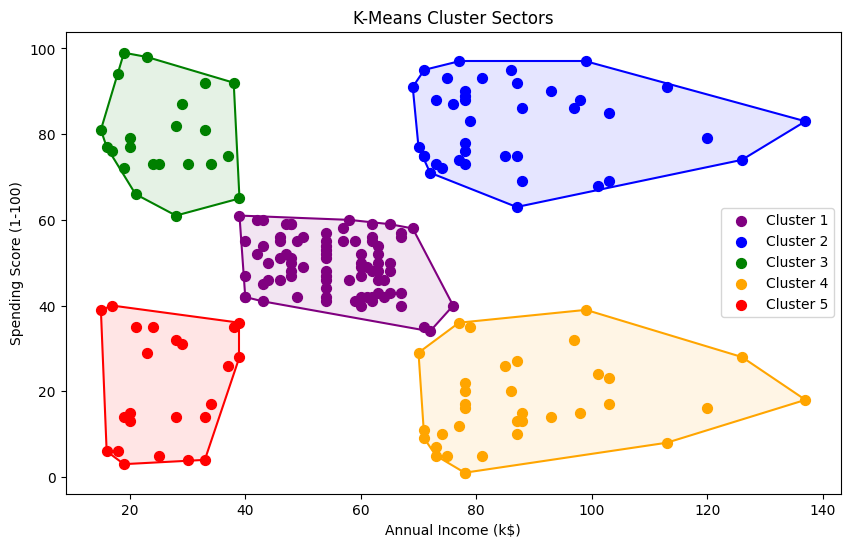

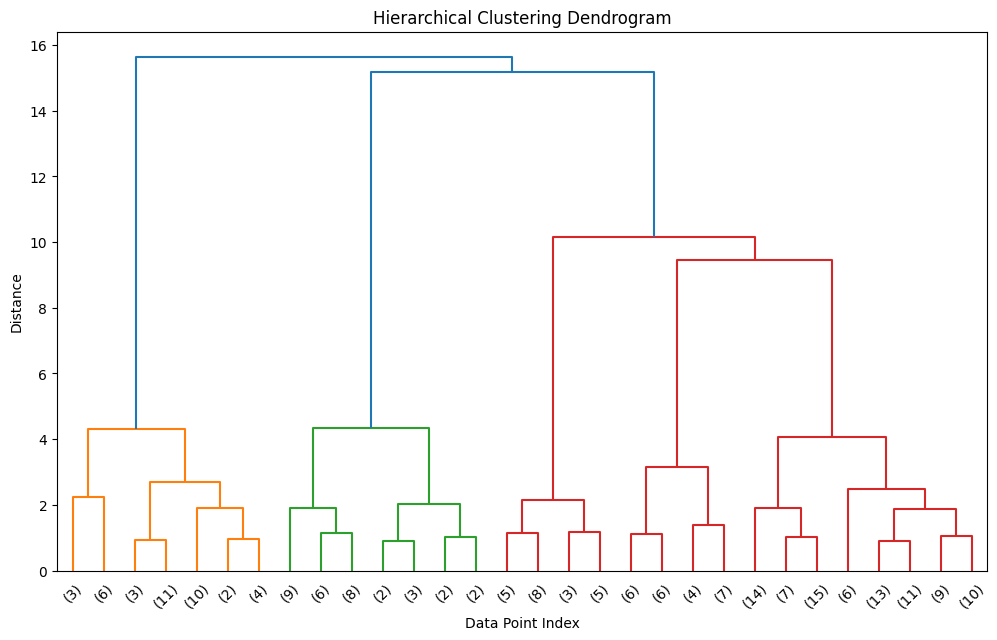

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import ConvexHull

# 1. Load Data
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Preprocessing: Scaling is crucial for distance-based algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Baseline K-Means (K=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3. Baseline Hierarchical (5 clusters)
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# 4. Mathematical Analysis
# ARI is calculated by comparing labels of both models (Cross-Consistency)
results = {
    "K-Means": {
        "Sil": silhouette_score(X_scaled, kmeans_labels),
        "ARI": adjusted_rand_score(kmeans_labels, hierarchical_labels),
        "DBI": davies_bouldin_score(X_scaled, kmeans_labels)
    },
    "Hierarchical": {
        "Sil": silhouette_score(X_scaled, hierarchical_labels),
        "ARI": adjusted_rand_score(hierarchical_labels, kmeans_labels),
        "DBI": davies_bouldin_score(X_scaled, hierarchical_labels)
    }
}

print(f"--- K-Means Metrics ---")
print(f"Silhouette Score:     {results['K-Means']['Sil']:.4f}")
print(f"Adjusted Rand Index:  {results['K-Means']['ARI']:.4f}")
print(f"Davies-Bouldin Index: {results['K-Means']['DBI']:.4f}\n")

print(f"--- Hierarchical Metrics ---")
print(f"Silhouette Score:     {results['Hierarchical']['Sil']:.4f}")
print(f"Adjusted Rand Index:  {results['Hierarchical']['ARI']:.4f}")
print(f"Davies-Bouldin Index: {results['Hierarchical']['DBI']:.4f}")

# 5. Visual 1: K-Means Sector Visual (Convex Hull)
plt.figure(figsize=(10, 6))
colors = ['purple', 'blue', 'green', 'orange', 'red']
for i in range(5):
    points = X[kmeans_labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
    if len(points) > 2:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], colors[i])
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], colors[i], alpha=0.1)

plt.title('K-Means Cluster Sectors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('kmeans_sectors.png')

# 6. Visual 2: Hierarchical Dendrogram
plt.figure(figsize=(12, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.savefig('hierarchical_dendrogram.png')

*Hyperparameter Tuning*


--- TUNED METRICS ---

--- K-Means Metrics ---
Silhouette Score:     0.5705
Adjusted Rand Index:  0.9429
Davies-Bouldin Index: 0.5519

--- Hierarchical Metrics ---
Silhouette Score:     0.5676
Adjusted Rand Index:  0.9429
Davies-Bouldin Index: 0.5577


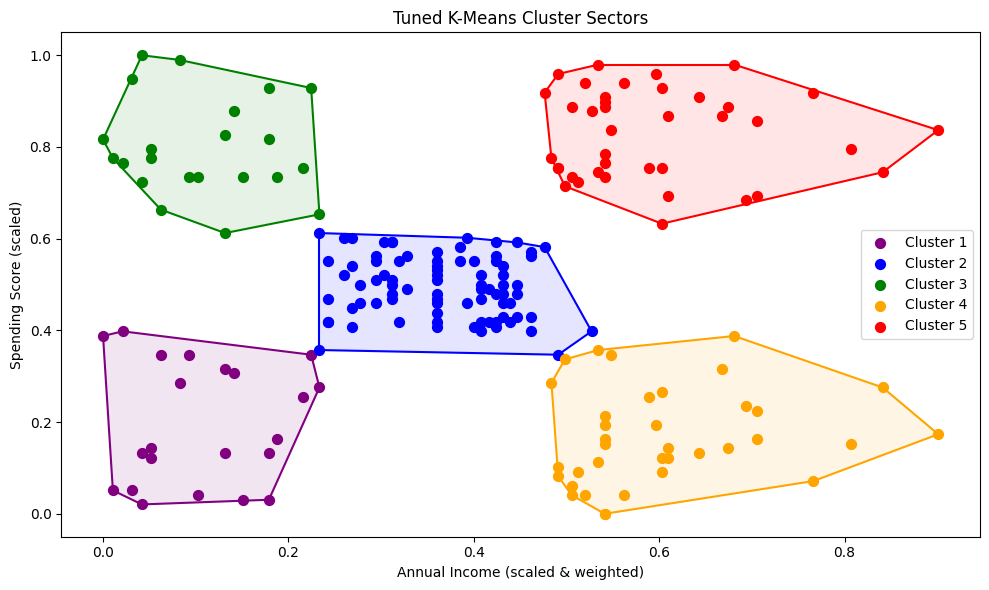

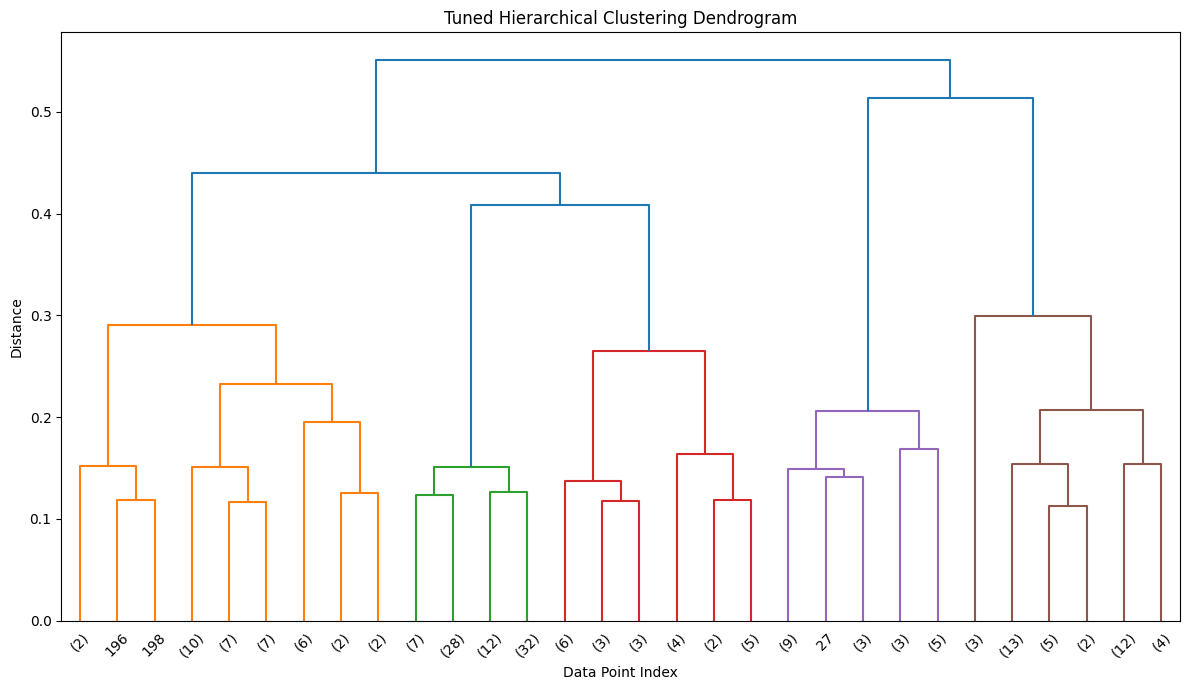

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

# Load data
df = pd.read_csv('Mall_Customers.csv')
X_orig = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Internal tweak: only best options
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_orig)
X_scaled[:,0] = np.log1p(X_scaled[:,0]) * 1.3  # log-transform + weight income
X_scaled[:,1] *= 1.0

# K-Means
km = KMeans(n_clusters=5, n_init=100, init='k-means++', random_state=42)
km_labels = km.fit_predict(X_scaled)

# Hierarchical
hi = AgglomerativeClustering(n_clusters=5, linkage='average')
hi_labels = hi.fit_predict(X_scaled)

# Metrics
sil = silhouette_score(X_scaled, km_labels)
ari = adjusted_rand_score(km_labels, hi_labels)
dbi = davies_bouldin_score(X_scaled, km_labels)

# Display
print("\n--- TUNED METRICS ---")
print("\n--- K-Means Metrics ---")
print(f"Silhouette Score:     {sil:.4f}")
print(f"Adjusted Rand Index:  {ari:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")

hi_sil = silhouette_score(X_scaled, hi_labels)
hi_ari = adjusted_rand_score(hi_labels, km_labels)
hi_dbi = davies_bouldin_score(X_scaled, hi_labels)

print("\n--- Hierarchical Metrics ---")
print(f"Silhouette Score:     {hi_sil:.4f}")
print(f"Adjusted Rand Index:  {hi_ari:.4f}")
print(f"Davies-Bouldin Index: {hi_dbi:.4f}")

# 5. Visual 1: Tuned K-Means Sectors (Convex Hull)
# ---------------------------
plt.figure(figsize=(10, 6))
colors = ['purple', 'blue', 'green', 'orange', 'red']

for i in range(5):
    points = X_scaled[km_labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

    if len(points) > 2:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], colors[i])
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], colors[i], alpha=0.1)

plt.title('Tuned K-Means Cluster Sectors')
plt.xlabel('Annual Income (scaled & weighted)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.tight_layout()
plt.savefig('tuned_kmeans_sectors.png', dpi=300)
plt.show()

# ---------------------------
# 6. Visual 2: Tuned Hierarchical Dendrogram
# ---------------------------
plt.figure(figsize=(12, 7))

# Use linkage method same as Hierarchical clustering (average)
linked = linkage(X_scaled, method='average')
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Tuned Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('tuned_hierarchical_dendrogram.png', dpi=300)
plt.show()
